## PYTHON PARA CIENCIA DE DATOS: PRACTICA

## Contenidos

* [00.Librerías y Carga de datos](#00.Librerías-y-Carga-de-datos)
* [01.Ejercicio 1: Análisis inicial](#01.Ejercicio-1:-Análisis-inicial)
    * [01.01.Número de muestras por cada variable:](#01.01.Número-de-muestras-por-cada-variable:)
    * [01.02.Media y desv estándar de variables numéricas:](#01.02.Media-y-desv-estándar-de-variables-numéricas:)
    * [01.03.Valor mín y máx de variables numéricas:](#01.03.Valor-mín-y-máx-de-variables-numéricas:)
* [02.Ejercicio 2: Agrupación de datos](#02.Ejercicio-2:-Agrupación-de-datos)
    * [02.01.Agrupación por tipo de dispositivo:](#02.01.Agrupación-por-tipo-de-dispositivo:)
    * [02.02.Agrupación por precio de venta](#02.02.Agrupación-por-precio-de-venta)
        * [02.02.01.Smartwatches <= media del precio:](#02.02.01.Smartwatches-<=-media-del-precio:)
        * [02.02.02.Smartwatches >= media del precio:](#02.02.02.Smartwatches->=-media-del-precio:)
        * [02.02.03.Fitnessbands <= media del precio:](#02.02.03.Fitnessbands-<=-media-del-precio:)
        * [02.02.04.Fitnessbands >= media del precio:](#02.02.04.Fitnessbands-<=-media-del-precio:)
    * [02.03.Agrupación por marca:](#02.03.Agrupación-por-marca:)
    * [02.04.Estadísticos de cada agrupación:](#02.04.Estadísticos-de-cada-agrupación:)
    * [02.05.Conclusiones:](#02.05.Conclusiones:)
* [03.Ejercicio 3: Duración batería/precio ratio](#03.Ejercicio-3:-Duración-batería/precio-ratio)
* [04.Ejercicio 4: Ordenar por ratio](#04.Ejercicio-4:-Ordenar-por-ratio)
* [05.Ejercicio 5: Total ingresos por marca](#05.Ejercicio-5:-Total-ingresos-por-marca)
* [06.Ejercicio 6: Diagrama de barras top 5 marcas](#06.Ejercicio-6:-Diagrama-de-barras-top-5-marcas)
* [07.Ejercicio 7: Correlación entre variables](#07.Ejercicio-7:-Correlación-entre-variables)
* [08.Ejercicio 8: Boxplot del precio/marca](#08.Ejercicio-8:-Boxplot-del-precio/marca)
* [09.Ejercicio 9: Análisis de variables](#09.Ejercicio-9:-Análisis-de-variables)

                                                .
                                                .
                                                .

#### Lo primero es la importación de librerias y carga de datos

## 00.Librerías y Carga de datos <a class="anchor" id="00.Librerías-y-Carga-de-datos"></a>

In [1]:
# Cargamos las liberías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Usando pandas cargamos el archivo .csv
raw_data = pd.read_csv("../01_Datos/Fitness_trackers.csv", decimal ='.', thousands = ",")

# Y comprobamos que se ha cargado correctamente con la función head()
raw_data.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN


                                                .
                                                .
                                                .

## 01.Ejercicio 1: Análisis inicial <a class="anchor" id="01.Ejercicio-1:-Análisis-inicial"></a>

In [3]:
# Vamos a visualizar la tabla completa para comprobar la consistencia en todas las filas
fitness_df = pd.DataFrame(raw_data)
fitness_df

# En un primer vistazo rápido nos damos cuenta de que la columna de Reviews no tiene ni un solo dato visible

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
560,Huawei,Smartwatch,Watch 36456,Black,55000,55000,AMOLED Display,4.1,Silicone,14,NaN
561,Huawei,Smartwatch,GT Fortuna-B19S Sport,Black,13990,20990,AMOLED Display,4.1,Elastomer,14,NaN
562,GOQii,FitnessBand,HR,Black,1999,1999,OLED Display,3.8,Silicone,7,NaN
563,GOQii,FitnessBand,Vital,Black,3499,3499,OLED Display,3.7,Thermoplastic polyurethane,7,NaN


                                                .

También salta a la vista que los precios no están en euros o en dólares. Tras una exploración rapida online, nos damos cuenta de que el precio parece estar en rupias.
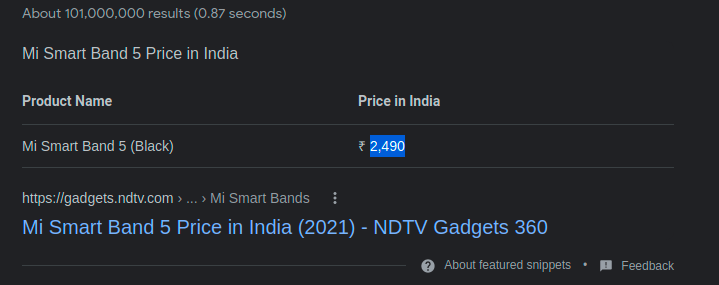

Tal y como se aprecia en la captura de google, la Xiaomi Smart Band 5 cuesta alrededor de 2490 rupias, que se acerca mucho al valor mostrado en la tabla.

Para que el análisis del dataset tenga un poco más de sentido, procedemos a transformar las variables de los precios a euros según el valor actual del euro-rupia.

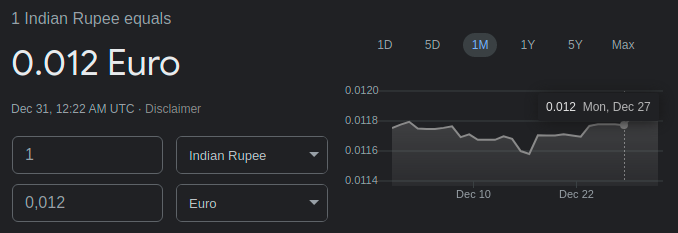

In [4]:
# Transformación de las variables "Selling Price" y "Original Price" a euros
# definimos la función
def precio_euros(df : object, column : str, conversion : float):
    '''Retorna el valor de una columna transformada por una conversión númerica'''
    df[column] = df[column] * conversion
    return df

# Ahora aplicamos la función a las variables a transformar
precio_euros(fitness_df, "Selling Price", 0.012)
precio_euros(fitness_df, "Original Price", 0.012)



,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,29.988,35.988,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,25.188,29.988,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,20.664,25.188,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,29.628,35.988,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,21.588,26.388,OLED Display,4.3,Plastic,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...
560,Huawei,Smartwatch,Watch 36456,Black,660.000,660.000,AMOLED Display,4.1,Silicone,14,NaN
561,Huawei,Smartwatch,GT Fortuna-B19S Sport,Black,167.880,251.880,AMOLED Display,4.1,Elastomer,14,NaN
562,GOQii,FitnessBand,HR,Black,23.988,23.988,OLED Display,3.8,Silicone,7,NaN
563,GOQii,FitnessBand,Vital,Black,41.988,41.988,OLED Display,3.7,Thermoplastic polyurethane,7,NaN


                                                .

### 01.01.Número de muestras por cada variable:  <a class="anchor" id="01.01.Número-de-muestras-por-cada-variable:"></a>

In [5]:
# Vamos a explorar el dataframe con la funcion "info"
fitness_df.info()

# Con esto confirmamos que las dos únicas columnas con valores NaN (faltantes) son "Rating" y "Reviews"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      565 non-null    object 
 1   Device Type                     565 non-null    object 
 2   Model Name                      565 non-null    object 
 3   Color                           565 non-null    object 
 4   Selling Price                   565 non-null    float64
 5   Original Price                  565 non-null    float64
 6   Display                         565 non-null    object 
 7   Rating (Out of 5)               514 non-null    float64
 8   Strap Material                  565 non-null    object 
 9   Average Battery Life (in days)  565 non-null    int64  
 10  Reviews                         78 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 48.7+ KB


####       - Rating: 514 muestras sin valores "missing"
####       - Reviews: 78 muestras sin valores "missing"
####       - Resto de variables: 565 muestras (ningún valor faltante)

                                                .

### 01.02.Media y desv estándar de variables numéricas:  <a class="anchor" id="01.02.Media-y-desv-estándar-de-variables-numéricas:"></a>

In [6]:
# Vamos a crear una función para calcular la media y desv tipica de una variable
def estadisticos(df : object, column : str):
    '''Retorna un dataframe con las columnas y los estadisticos de media y desviacion estandar de cada
    columna numérica inputada en el argumento de la función'''
    media = df[column].mean().round(2)
    desv_est = df[column].std().round(2)
    est_df = pd.DataFrame({"Variable": column, "Media": media, "Desviacion estandar": desv_est}, index= [0])
    return est_df

# Ahora calculamos la media y desviación de cada variable numérica
sp = estadisticos(fitness_df, "Selling Price")
op = estadisticos(fitness_df, "Original Price")
ra5 = estadisticos(fitness_df, "Rating (Out of 5)")
avgbl = estadisticos(fitness_df, "Average Battery Life (in days)")
rev = estadisticos(fitness_df, "Reviews")

# Finalmente unimos todos los df de las variables en un unico dataframe para una mejor visualizacion
variables_num = [sp, op, ra5, avgbl, rev]

vnum_df = pd.concat(variables_num)
vnum_df

,Variable,Media,Desviacion estandar
0,Selling Price,265.32,238.98
0,Original Price,304.38,244.61
0,Rating (Out of 5),4.23,0.39
0,Average Battery Life (in days),9.03,7.87
0,Reviews,2492.95,5607.53


                                                .

### 01.03.Valor mín y máx de variables numéricas:  <a class="anchor" id="01.03.Valor-mín-y-máx-de-variables-numéricas:"></a>

In [7]:
# Vamos a crear una función para calcular valores minimos y maximos de una variable
def valores(df : object, column : str):
    '''Retorna un dataframe con las columnas y los estadisticos de valor mínimo y máximo de cada
    columna numérica inputada en el argumento de la función'''
    valor_min = df[column].min().round(2)
    valor_max = df[column].max().round(2)
    est_df = pd.DataFrame({"Variable": column, "Valor mín": valor_min, "Valor máx": valor_max}, index= [1])
    return est_df

# Ahora calculamos valores minimos y maximos de cada variable numérica
sp_val = valores(fitness_df, "Selling Price")
op_val = valores(fitness_df, "Original Price")
ra5_val = valores(fitness_df, "Rating (Out of 5)")
avgbl_val = valores(fitness_df, "Average Battery Life (in days)")
rev_val = valores(fitness_df, "Reviews")

# Finalmente unimos todos los df de las variables en un unico dataframe para una mejor visualizacion
valores_num = [sp_val, op_val, ra5_val, avgbl_val, rev_val]

valnum_df = pd.concat(valores_num)
valnum_df

,Variable,Valor mín,Valor máx
1,Selling Price,14.34,1465.08
1,Original Price,19.19,1465.08
1,Rating (Out of 5),2.00,5.00
1,Average Battery Life (in days),1.00,45.00
1,Reviews,2.00,23426.00


                                                .
                                                .
                                                .

## 02.Ejercicio 2: Agrupación de datos <a class="anchor" id="02.Ejercicio-2:-Agrupación-de-datos"></a>

Vamos a realizar una serie de agrupaciones por determinadas características, para posteriormente hacer un análisis basado en esas agrupaciones

In [8]:
# Vamos a crear una lista de númericos para filtrar las variables numéricas posteriormente
numerics = ["float64", "int64"]

                                                .

### 02.01.Agrupación por tipo de dispositivo:  <a class="anchor" id="02.01.Agrupación-por-tipo-de-dispositivo:"></a>

In [9]:
# Usamos la función groupby() para agrupar los datos en función al tipo de dispositivo
dev = fitness_df.groupby("Device Type")
dev_fb = fitness_df[fitness_df["Device Type"] == "FitnessBand"]
dev_sw = fitness_df[fitness_df["Device Type"] == "Smartwatch"]

# Y ahora imprimimos los estadisticos

In [10]:
# Número de observaciones
dev.size()

Device Type
FitnessBand     75
Smartwatch     490
dtype: int64

In [11]:
# Número de valores ausentes del tipo fitnessband
dev_fb.select_dtypes(include = numerics).isnull().sum()

Selling Price                      0
Original Price                     0
Rating (Out of 5)                  0
Average Battery Life (in days)     0
Reviews                           62
dtype: int64

In [12]:
# Número de valores ausentes del tipo smartwatch
dev_sw.select_dtypes(include = numerics).isnull().sum()

Selling Price                       0
Original Price                      0
Rating (Out of 5)                  51
Average Battery Life (in days)      0
Reviews                           425
dtype: int64

In [13]:
# Mediana de las variables númericas
dev.median()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,35.988,47.988,4.2,7.0,4628.0
Smartwatch,227.880,263.880,4.3,7.0,259.0


In [14]:
# Varianza de las variables númericas
dev.var()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,2824.523534,5591.090974,0.100389,9.543063,7.087130e+07
Smartwatch,58399.055111,59928.017369,0.158759,69.678432,1.422115e+07


In [15]:
# Mínimos valores
dev.min().select_dtypes(include = numerics)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,14.34,19.188,2.8,3,77.0
Smartwatch,16.74,23.940,2.0,1,2.0


In [16]:
# Máximos valores
dev.max().select_dtypes(include = numerics)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,203.988,462.00,4.7,20,23426.0
Smartwatch,1465.080,1465.08,5.0,45,23069.0


                                                .

### 02.02.Agrupación por precio de venta  <a class="anchor" id="02.02.Agrupación-por-precio-de-venta"></a>

In [17]:
# Vamos primero a crear la media del precio por dispositivo
type_price = fitness_df.groupby("Device Type").mean("Selling Price")
fb_price = type_price["Selling Price"][0]
sw_price = type_price["Selling Price"][1]
print("Precio medio por smartwatch = " + str((sw_price).round(2)) + " euros")
print("Precio medio por fitnessband = " + str((fb_price).round(2)) + " euros")

Precio medio por smartwatch = 295.87 euros
Precio medio por fitnessband = 65.75 euros


In [18]:
# Definimos una función para sacar los grupos con precio inferior a la media
def precio_inferior(device: str, mediaprecio: float):
    '''Retorna un dataframe con las filas cuyo dispositivo sea el device elegido en el argumento,
    y cuyo precio de venta sea menor a la media del precio de venta de dicho dispositivo.
    device: es el tipo de dispositivo, smartwatch o fitnessband
    mediaprecio: es la media del precio de venta de cada tipo de dispositivo'''
    device_df = fitness_df.loc[(fitness_df["Device Type"] == device)]
    inferior = device_df.loc[(fitness_df["Selling Price"] <= mediaprecio)]
    return inferior

# Y ahora otra función para los grupos con precios superior a la media
def precio_superior(device: str, mediaprecio: float):
    '''Retorna un dataframe con las filas cuyo dispositivo sea el device elegido en el argumento,
    y cuyo precio de venta sea mayor a la media del precio de venta de dicho dispositivo.
    device: es el tipo de dispositivo, smartwatch o fitnessband
    mediaprecio: es la media del precio de venta de cada tipo de dispositivo'''
    device_df = fitness_df.loc[(fitness_df["Device Type"] == device)]
    superior = device_df.loc[(fitness_df["Selling Price"] >= mediaprecio)]
    return superior

                                                .

### 02.02.01.Smartwatches <= media del precio:  <a class="anchor" id="02.02.01.Smartwatches-<=-media-del-precio:"></a>

In [19]:
# Ahora agrupamos por tipo de dispositivo = smartwatch y precio inferior a la media
sw_df_inferior = precio_inferior("Smartwatch", sw_price).groupby("Device Type")

# Y sacamos los estadísticos:

In [20]:
# Número de observaciones
sw_df_inferior.size()

Device Type
Smartwatch    323
dtype: int64

In [21]:
# Número de valores faltantes
sw_inferior = fitness_df.loc[(fitness_df["Device Type"] == "Smartwatch") & (fitness_df["Selling Price"] <= sw_price)]
sw_inferior.select_dtypes(include = numerics).isnull().sum()

Selling Price                       0
Original Price                      0
Rating (Out of 5)                  17
Average Battery Life (in days)      0
Reviews                           258
dtype: int64

In [22]:
# Mediana de las variables númericas
sw_df_inferior.median()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
Smartwatch,161.94,203.988,4.2,7.0,259.0


In [23]:
# Varianza de las variables númericas
sw_df_inferior.var()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
Smartwatch,5442.463135,6428.084962,0.156918,36.423918,1.422115e+07


In [24]:
# Mínimos valores
sw_df_inferior.min().select_dtypes(include = numerics)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
Smartwatch,16.74,23.94,2.0,1,2.0


In [25]:
# Máximos valores
sw_df_inferior.max().select_dtypes(include = numerics)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
Smartwatch,293.94,414.6,5.0,28,23069.0


                                                .

### 02.02.02.Smartwatches >= media del precio:  <a class="anchor" id="02.02.02.Smartwatches->=-media-del-precio:"></a>

In [26]:
# Ahora agrupamos por tipo de dispositivo = smartwatch y precio superior a la media
sw_df_superior = precio_superior("Smartwatch", sw_price).groupby("Device Type")

# Y sacamos los estadísticos:

In [27]:
# Número de observaciones
sw_df_superior.size()

Device Type
Smartwatch    167
dtype: int64

In [28]:
# Número de valores faltantes
sw_superior = fitness_df.loc[(fitness_df["Device Type"] == "Smartwatch") & (fitness_df["Selling Price"] >= sw_price)]
sw_superior.select_dtypes(include = numerics).isnull().sum()

Selling Price                       0
Original Price                      0
Rating (Out of 5)                  34
Average Battery Life (in days)      0
Reviews                           167
dtype: int64

In [29]:
# Mediana de las variables númericas
sw_df_superior.median()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
Smartwatch,490.8,526.8,4.5,7.0,NaN


In [30]:
# Varianza de las variables númericas
sw_df_superior.var()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
Smartwatch,54465.631364,59018.886235,0.109174,134.121925,NaN


In [31]:
# Mínimos valores
sw_df_superior.min().select_dtypes(include = numerics)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
Smartwatch,299.868,299.88,3.2,1,NaN


In [32]:
# Máximos valores
sw_df_superior.max().select_dtypes(include = numerics)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
Smartwatch,1465.08,1465.08,5.0,45,NaN


                                                .

### 02.02.03.Fitnessbands <= media del precio:  <a class="anchor" id="02.02.03.Fitnessbands-<=-media-del-precio:"></a>

In [33]:
# Ahora agrupamos por tipo de dispositivo = smartwatch y precio superior a la media
fb_df_inferior = precio_inferior("FitnessBand", fb_price).groupby("Device Type")

# Y sacamos los estadísticos:

In [34]:
# Número de observaciones
fb_df_inferior.size()

Device Type
FitnessBand    45
dtype: int64

In [35]:
# Número de valores faltantes
fb_inferior = fitness_df.loc[(fitness_df["Device Type"] == "FitnessBand") & (fitness_df["Selling Price"] <= fb_price)]
fb_inferior.select_dtypes(include = numerics).isnull().sum()

Selling Price                      0
Original Price                     0
Rating (Out of 5)                  0
Average Battery Life (in days)     0
Reviews                           33
dtype: int64

In [36]:
# Mediana de las variables númericas
fb_df_inferior.median()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,26.388,35.988,4.1,7.0,4628.0


In [37]:
# Varianza de las variables númericas
fb_df_inferior.var()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,136.83,365.673171,0.129727,13.437374,6.947212e+07


In [38]:
# Mínimos valores
fb_df_inferior.min().select_dtypes(include = numerics)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,14.34,19.188,2.8,3,122.0


In [39]:
# Máximos valores
fb_df_inferior.max().select_dtypes(include = numerics)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,63.588,119.88,4.4,20,23426.0


                                                .

### 02.02.04.Fitnessbands >= media del precio:  <a class="anchor" id="02.02.04.Fitnessbands->=-media-del-precio:"></a>

In [40]:
# Ahora agrupamos por tipo de dispositivo = smartwatch y precio superior a la media
fb_df_superior = precio_superior("FitnessBand", fb_price).groupby("Device Type")

# Y sacamos los estadísticos:

In [41]:
# Número de observaciones
fb_df_superior.size()

Device Type
FitnessBand    30
dtype: int64

In [42]:
# Número de valores faltantes
fb_superior = fitness_df.loc[(fitness_df["Device Type"] == "FitnessBand") & (fitness_df["Selling Price"] >= fb_price)]
fb_superior.select_dtypes(include = numerics).isnull().sum()

Selling Price                      0
Original Price                     0
Rating (Out of 5)                  0
Average Battery Life (in days)     0
Reviews                           29
dtype: int64

In [43]:
# Mediana de las variables númericas
fb_df_superior.median()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,107.934,173.934,4.3,7.0,77.0


In [44]:
# Varianza de las variables númericas
fb_df_superior.var()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,1772.396736,4687.986609,0.036138,2.822989,NaN


In [45]:
# Mínimos valores
fb_df_superior.min().select_dtypes(include = numerics)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,65.988,65.988,3.8,5,77.0


In [46]:
# Máximos valores
fb_df_superior.max().select_dtypes(include = numerics)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,203.988,462.0,4.7,14,77.0


                                                .

### 02.03.Agrupación por marca:  <a class="anchor" id="02.03.Agrupación-por-marca:"></a>

In [47]:
# Usamos la función groupby() para agrupar los datos en función al tipo de dispositivo
br_df = fitness_df.groupby("Brand Name")

# Y ahora imprimimos los estadisticos

In [48]:
# Número de observaciones
br_df.size().sort_values(ascending = False)

Brand Name
FOSSIL      133
GARMIN      101
APPLE        86
FitBit       51
SAMSUNG      48
huami        36
Huawei       26
Honor        20
Noise        17
realme       12
Xiaomi       10
Fastrack      6
GOQii         4
boAt          4
OnePlus       3
Noise         2
Oppo          2
LCARE         2
LAVA          1
Infinix       1
dtype: int64

In [49]:
# Número de valores ausentes
br_df.apply(lambda x: x.isnull().sum()).sort_values("Reviews", ascending = False)


,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
Brand Name,,,,,,,,,,,
FOSSIL,0,0,0,0,0,0,0,0,0,0,118
GARMIN,0,0,0,0,0,0,0,51,0,0,101
APPLE,0,0,0,0,0,0,0,0,0,0,86
FitBit,0,0,0,0,0,0,0,0,0,0,51
SAMSUNG,0,0,0,0,0,0,0,0,0,0,48
Huawei,0,0,0,0,0,0,0,0,0,0,26
Noise,0,0,0,0,0,0,0,0,0,0,17
Xiaomi,0,0,0,0,0,0,0,0,0,0,8
realme,0,0,0,0,0,0,0,0,0,0,8


In [50]:
# Mediana de las variables númericas
br_df.median().sort_values("Selling Price", ascending = False)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Brand Name,,,,,
APPLE,548.280,598.800,4.60,1.0,NaN
GARMIN,347.880,377.880,4.20,14.0,NaN
SAMSUNG,263.874,326.880,4.30,14.0,NaN
Oppo,197.880,269.880,3.90,14.0,484.0
FitBit,179.880,191.988,4.20,7.0,NaN
FOSSIL,161.940,197.940,4.30,2.0,46.0
Huawei,143.880,245.880,4.25,14.0,NaN
huami,71.988,155.988,4.20,14.0,489.0
realme,53.520,77.988,4.10,10.5,633.0


In [51]:
# Varianza de las variables númericas
br_df.var().sort_values("Selling Price", ascending = False)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Brand Name,,,,,
GARMIN,61993.269089,75450.569237,0.377963,108.498416,NaN
APPLE,61146.062401,58524.249324,0.034272,0.000000,NaN
Huawei,25252.024067,23693.892759,0.105662,12.061538,NaN
SAMSUNG,14870.968647,16537.106814,0.214025,10.751330,NaN
OnePlus,7050.720000,8929.920000,0.010000,16.333333,NaN
FitBit,4823.181823,5227.996299,0.034408,0.692549,NaN
FOSSIL,3645.150054,2590.327848,0.153396,27.458874,2.144055e+04
Honor,3242.233410,6776.532765,0.141553,31.460526,6.238445e+07
Xiaomi,2973.324006,4808.016000,0.066778,17.833333,5.000000e-01


In [52]:
# Mínimos valores
br_df.min().select_dtypes(include = numerics).sort_values("Selling Price", ascending = False)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Brand Name,,,,,
APPLE,202.800,250.800,3.4,1,NaN
Oppo,179.880,239.880,3.9,14,484.0
GARMIN,107.880,107.880,2.0,5,NaN
FitBit,63.588,95.988,3.8,5,NaN
FOSSIL,45.588,83.940,2.8,1,4.0
Noise,29.988,59.988,3.9,7,NaN
boAt,29.988,71.880,3.6,7,529.0
OnePlus,29.988,33.588,4.2,7,NaN
SAMSUNG,24.000,31.080,2.3,7,NaN


In [53]:
# Máximos valores
br_df.max().select_dtypes(include = numerics)

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Brand Name,,,,,
APPLE,1465.080,1465.080,5.0,1,NaN
FOSSIL,311.940,311.940,5.0,14,600.0
Fastrack,29.940,35.940,4.1,10,NaN
FitBit,317.988,462.000,4.7,10,NaN
GARMIN,1271.880,1433.880,5.0,45,NaN
GOQii,47.988,47.988,3.8,7,NaN
Honor,215.988,251.988,4.4,25,23426.0
Huawei,660.000,660.000,4.5,14,NaN
Infinix,17.988,35.988,3.8,4,NaN


                                                .

### 02.05.Conclusiones:  <a class="anchor" id="02.05.Conclusiones:"></a>

1- El agrupamiento por <b>tipo de dispositivo</b> nos da información muy útil de entrada:

    - FitnessBand  75   elementos      62   NaN en "Reviews"
    - Smartwatch   490  elementos      425  NaN en "Reviews" y 51 en "Ratings"
        

Dónde se puede apreciar nada más empezar, que la <b>mayoría del dataset</b> está compuesto de <b>Smartwatches (83.73 %)</b>.
También, y como es lógico, la mayoría de valores faltantes está en Smartwatches.

Atendiendo a valores mínimos y máximos y a la mediana del precio de venta:

    - FitnessBand  35.99   mediana precio    14.35  min precio      203.99   máx precio
    - Smartwatch   227.88  mediana precio    16.74  min precio      1465.08  máx precio

Observamos que los <b>Smartwatches</b> tienen un <b>amplio rango de precios</b>, mientras que las <b>Fitnessband</b> se concentran en un rango de precio <b>más reducido</b>. Los precios mínimos son muy similares, pero el precio <b>máximo y la mediana</b> de los <b>Smartwatch</b> es <b>significativamente superior</b>.


2- El agrupamiento por <b>media del precio </b> según <b>dispositivo </b>:

                      inferior                 superior
                        
     - FitnessBand   45   elementos       30   elementos
     - Smartwatch    323  elementos       167  elementos
     
Aquí ya empezamos a profundidad en las características de cada tipo de dispositivo más en detalle. Podemos observar que <b>ambos dispositivos</b> tienen <b>más elementos por debajo de la media que por encima</b>, pero en las Fitnessband hay muy poca diferencia entre los elementos por encima y por debajo de la media, mientras que en los <b>Smartwatch hay casi el doble de elementos por debajo de la media que por encima</b>.

3- Finalmente, el agrupamiento por marca:

Tabla

Como <b>conclusión</b> general, los smartwatch tienen mayor cantidad y variedad de dispositivos y precios, con un rango mucho más amplio que las fitnessband, lo que tiene sentido si consideramos las características y capacidades de cada dispositivo (los smartwatch suelen ofrecer mayor variedad de servicios y complejidad).

                                                .
                                                .
                                                .

## 03.Ejercicio 3: Duración batería/precio ratio <a class="anchor" id="03.Ejercicio-3:-Duración-batería/precio-ratio"></a>

In [54]:
# Primero vamos a calcular la media del ratio de duración de la bateria respecto al precio
ratio_durprec_media = (fitness_df["Average Battery Life (in days)"]*1000 / fitness_df["Original Price"]).mean()
print(str(ratio_durprec_media.round(2)) + " media ratio batería/precio")

60.42 media ratio batería/precio


In [55]:
# Ahora vamos a seleccionar los dispositivos con mayor ratio batería/precio respecto a la media
mayor_ratio_df = fitness_df.loc[((fitness_df["Average Battery Life (in days)"]*1000) / fitness_df["Original Price"] > ratio_durprec_media)]
mayor_ratio_df = mayor_ratio_df.reset_index(drop=True)

                                                .
                                                .
                                                .

## 04.Ejercicio 4: Ordenar por ratio <a class="anchor" id="04.Ejercicio-4:-Ordenar-por-ratio"></a>

In [56]:
# Ahora vamos a ordenar los dispositivos del dataframe creado en el ej 3 de mayor a menor
mayor_ratio_df["Ratio battery/price"] = mayor_ratio_df["Average Battery Life (in days)"]*1000 / mayor_ratio_df["Original Price"]
mayor_ratio_df = mayor_ratio_df.sort_values("Ratio battery/price", ascending = False)
mayor_ratio_df.reset_index(drop=True).head(11)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews,Ratio battery/price
0,Xiaomi,FitnessBand,Band - HRX Edition,Black,15.588,21.588,OLED Display,4.2,Plastic,20,NaN,926.440615
1,Xiaomi,FitnessBand,HMSH01GE,Black,20.664,25.188,LCD Display,3.5,Leather,14,NaN,555.820232
2,Xiaomi,FitnessBand,Smart Band 4,Black,25.188,29.988,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN,466.853408
3,Fastrack,Smartwatch,Reflex 2.0,"Black, Green",16.740,23.940,TFT-LCD Display,4.1,Silicone,10,NaN,417.710944
4,huami,Smartwatch,Amazfit Bip,Pink,65.988,71.880,AMOLED Display,4.2,Silicone,28,489.0,389.538119
5,huami,Smartwatch,Amazfit Bip,Red,59.400,71.880,AMOLED Display,4.2,Silicone,28,176.0,389.538119
6,Xiaomi,FitnessBand,Smart Band 5,Black,29.988,35.988,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN,389.018562
7,Honor,FitnessBand,Band 5,Olive Green,26.388,35.988,AMOLED Display,4.4,Plastic,14,4628.0,389.018562
8,Honor,FitnessBand,Band 5,Black,25.188,35.988,AMOLED Display,4.4,Plastic,14,4628.0,389.018562
9,Honor,FitnessBand,Band 5,Black,34.788,35.988,AMOLED Display,4.4,Plastic,14,4628.0,389.018562


                                                .

#### CONCLUSIÓN :
La marca que más relaciona el precio de venta con la duración de la batería es <b>Xiaomi</b>

                                                .
                                                .
                                                .

## 05.Ejercicio 5: Total ingresos por marca<a class="anchor" id="05.Ejercicio-5:-Total-ingresos-por-marca"></a>

In [57]:
# Ahora calculamos el total de ingresos por venta de dispositivos en función de la marca
br_ingresos = pd.DataFrame(fitness_df, columns=["Brand Name", "Selling Price"])
br_ingresos.groupby("Brand Name").sum().sort_values("Selling Price", ascending = False)
#br_df.sum().sort_values("Selling Price", ascending = False)

,Selling Price
Brand Name,
APPLE,50995.080
GARMIN,42466.332
FOSSIL,22064.628
SAMSUNG,13191.192
FitBit,8579.532
Huawei,4952.880
huami,3260.580
Honor,1322.400
Noise,679.164


                                                .
                                                .
                                                .

## 06.Ejercicio 6: Diagrama de barras top 5 marcas <a class="anchor" id="06.Ejercicio-6:-Diagrama-de-barras-top-5-marcas"></a>

In [58]:
# Primero vamos a crear el dataframe del top 5 marcas
top5 = br_ingresos.groupby("Brand Name").sum().sort_values("Selling Price", ascending = False)
brands = ["APPLE", "GARMIN", "FOSSIL", "SAMSUNG", "FitBit"]
top5 = pd.DataFrame(top5, columns = ["Brand Name", "Selling Price"]).iloc[0:5].reset_index(drop=True)
top5["Brand Name"] = brands

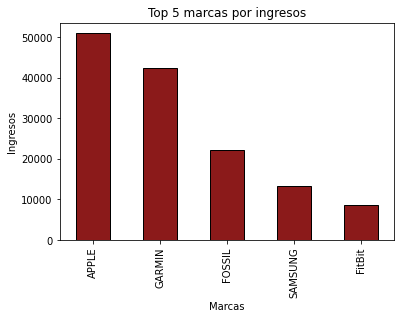

In [59]:
# Representar el top 5 marcas con mayor ingresos por venta
hist = top5["Selling Price"]\
    .plot(kind = "bar", xlabel = "Marcas", ylabel= "Ingresos",\
     edgecolor="black", color="#8B1A1A", title = 'Top 5 marcas por ingresos').set_xticklabels(brands)


                                                .
                                                .
                                                .

## 07.Ejercicio 7: Correlación entre variables <a class="anchor" id="07.Ejercicio-7:-Correlación-entre-variables"></a>

In [76]:
# Probramos primero con el método corr() de pandas
fitness_df.corr()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Selling Price,1.000000,0.982482,0.297304,0.142029,-0.371417
Original Price,0.982482,1.000000,0.296131,0.189265,-0.420695
Rating (Out of 5),0.297304,0.296131,1.000000,-0.162465,0.104887
Average Battery Life (in days),0.142029,0.189265,-0.162465,1.000000,-0.140554
Reviews,-0.371417,-0.420695,0.104887,-0.140554,1.000000


                                                .

Generalmente apreciamos una baja correlación entre variables (excepto obviamente entre "Selling Price" y "Original Price" pero no es relevante).
La variables más correlacionadas son (en orden):

    1- "Original Price" y "Reviews" : correlación del -0,42
    2- "Selling Price" y "Reviews" : correlación del -0,37
    2- "Rating" con "Selling Price" y "Original Price" respectivamente: correlación del 0.30

                                                .

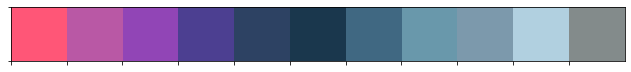

In [61]:
# Ahora vamos a probar a representarla usando algunos gráficos de la librería seaborn
# Primero vamos a crear una paleta de colores personalizada para nuestros gráficos
colors = ["#FF5677","#B958A5","#9145B6","#4C3F91","#2D4263","#1A374D","#406882","#6998AB","#7C99AC","#B1D0E0","#838B8B"]
palette = sns.color_palette(palette = colors)
sns.palplot(palette, size =1)
plt.show()

                                                .

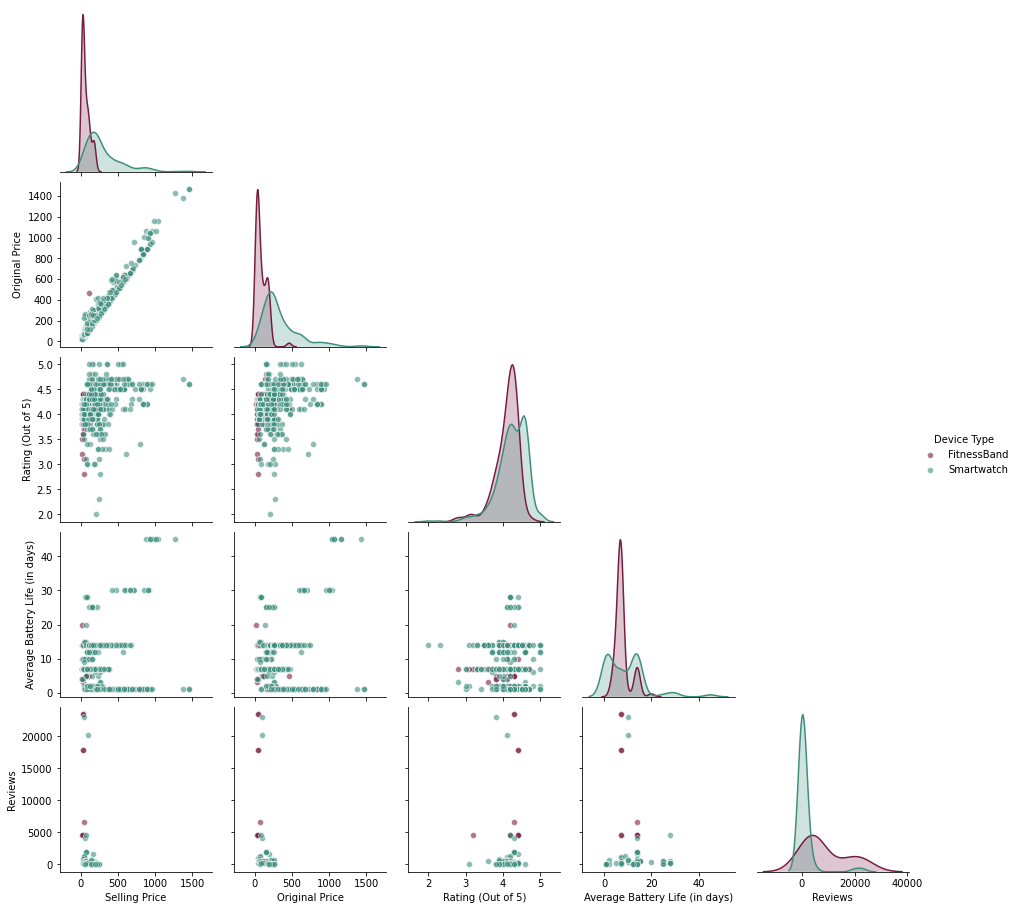

In [62]:
# Y ahora vamos a representar el correlograma básico de seaborn
corr = sns.pairplot(fitness_df, hue = "Device Type", corner= True, palette = ("#781D42", "#3E8E7E")\
                   , plot_kws=dict(alpha=0.6))

                                                .

Atendiendo al correlograma, parece que se confirman visualmente (de manera muy ligera, no es evidentemente lineal) una cierta relación lineal entre las variables de precio y las de Ratings y Reviews.

También se aprecian muy ligeras relaciones entre las variables "Price" y la de "Average battery life", dónde a medida que aumentan los días de batería parece haber un aumento de precio, aunque no es claramente uniforme.

Finalmente, también parece haber cierta correlación entre la variable "Rating" y la de "Average battery life".

La mayoría de estas relaciones se ven más claras en los smartwatch, ya que no hay suficientes datos de fitnessbands para poder establecer conclusiones claras en cuanto a relación de variables.

                                                .

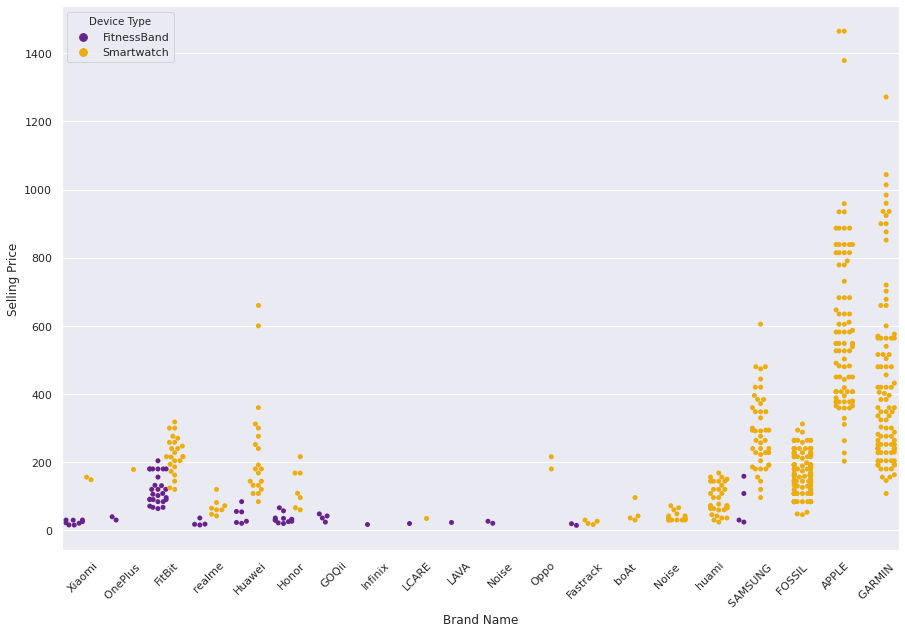

In [67]:
# Vamos ahora a crear un swarmplot de los tipos de dispositvo, en función de la marca y el precio de venta.
swarmplot = sns.set(rc = {'figure.figsize':(15,10)})
swarmplot = sns.swarmplot(fitness_df["Brand Name"], fitness_df["Selling Price"]\
            , hue = "Device Type", palette = ("#68228B", "#EEAD0E"), data=fitness_df, dodge=True)
swarmplot = plt.xticks(rotation=45)

                                                .

El Swarmplot nos permite ver la relación entre marca y precio, en función al tipo de dispositivo también.

Una vez más, queda clara la evidente falta de datos de las fitnessbands. No obstante si se aprecia una clara relación entre las marcas con mayor número de oferta de dispositivos smartwatch y su precio de venta.

Este gráfico nos permite ver también las gamas en las que se encuentran las distintas compañías, dónde Apple es claro vencedor como marca que ofrece una gama más alta (mayor precio) de productos smartwatch.

Finalmente, otra conclusión clara en este gráfico y algún análisis anterior, es que las compañías con mayor ventas y mayor número de dispositivos, están centradas en la oferta de dispositivos smartwatch.

                                                .

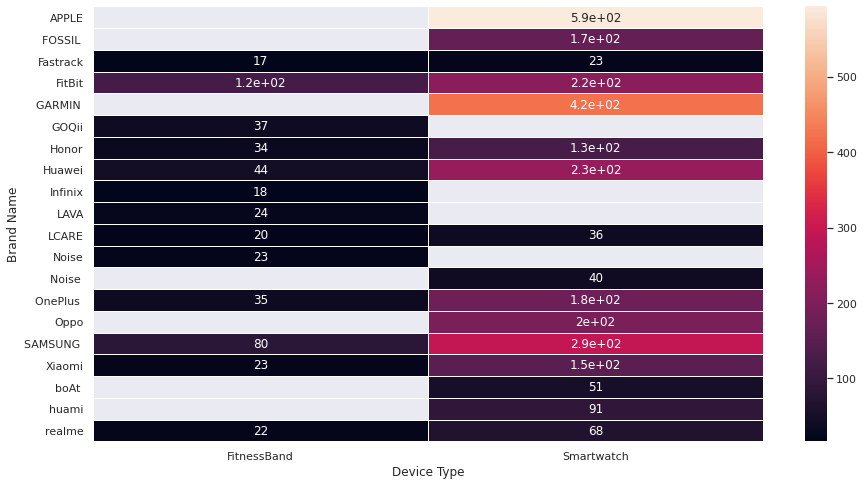

In [75]:
# Y finalmente un heatmap
heatmap = plt.subplots(figsize=(15, 8))
heatmap_df = fitness_df.pivot_table(values='Selling Price', index=['Brand Name'],
                       columns='Device Type')
heatmap = sns.heatmap(heatmap_df, annot=True, linewidths=.5)

                                                .

El heatmap confirma y reitera la relación entre las marcas con el precio de venta, y la variedad en gamas (baja, media y alta) que ofrecen los smartwatch frente al poco rango de las fitnessbands.

                                                .

## 08.Ejercicio 8: Boxplot del precio/marca <a class="anchor" id="08.Ejercicio-8:-Boxplot-del-precio/marca"></a>

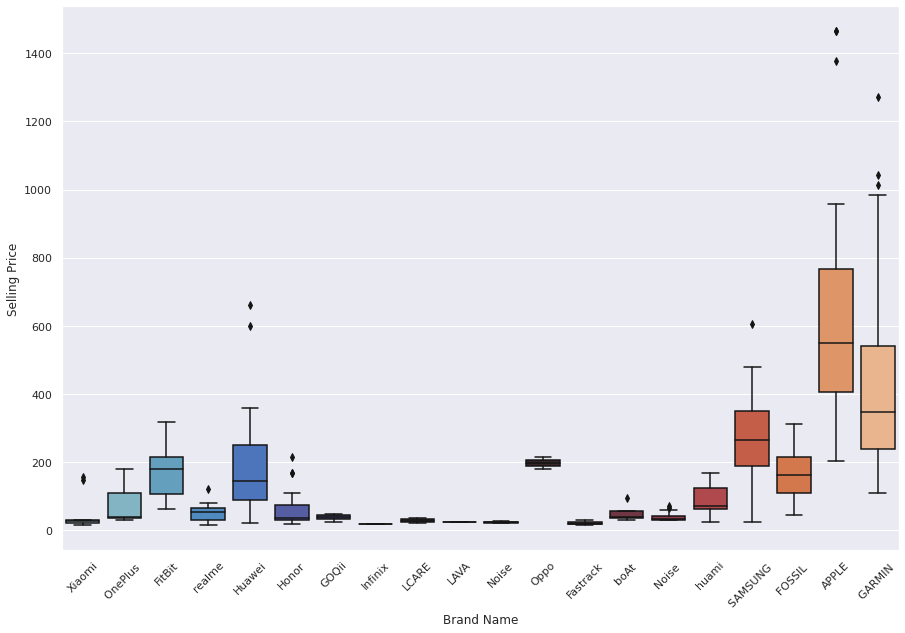

In [65]:

boxplot = sns.set(rc = {'figure.figsize':(15,10)})
boxplot = sns.boxplot(fitness_df["Brand Name"], fitness_df["Selling Price"], data=fitness_df, palette = "icefire")
boxplot = plt.xticks(rotation=45)

                                                .

Las conclusiones del Boxplot son iguales a las de gráficos anteriores. Se ve de manera muy visual la relación entre las compañías que tienen mayor oferta de dispositivos smartwatch y el número de ventas y precios.

                                                .

## 09.Ejercicio 9: Análisis de variables <a class="anchor" id="09.Ejercicio-9:-Análisis-de-variables"></a>